# About


TopBank is a large banking services company. It operates mainly in European countries offering financial products, from bank accounts to investments, including some types of insurance and investment products.

The company's business model is a service type, it sells banking services to its customers through physical branches and an online portal.

The company's main product is a bank account, in which the customer can deposit his salary, make withdrawals, deposits and transfer to other accounts. This bank account has no cost to the customer and is valid for 12 months, that is, the customer needs to renew the contract of that account to continue using it for the next 12 months.

According to the TopBank Analytics team, each customer who has this bank account returns a monetary value of 15% of the value of their estimated salary, if it is less than the average and 20% if this salary is higher than the average, during the current period of your account. This value is calculated annually.

## Business problem

In recent months, the Analytics team realized that the rate of customers canceling their accounts and leaving the bank, reached unprecedented numbers in the company. Concerned about the increase in this rate, the team devised an action plan to reduce the rate of customer evasion.

Concerned about the drop in this metric, TopBottom's Analytics team hired you as a Data Science consultant to create an action plan, with the objective of reducing customer evasion, that is, preventing the customer from canceling his contract and not renew it for another 12 months. This evasion, in business metrics, is known as Churn.

## The challenge


As a Data Science Consultant, you need to create an action plan to decrease the number of churn customers and show the financial return on your solution.

At the end of your consultancy, you need to deliver to the TopBottom CEO a model in production, which will receive a customer base via API and return that same base “scorada”, that is, one more column with the probability of each customer entering into churn.

In addition, you will need to provide a report reporting the performance of your model and the financial impact of your solution. Questions that the CEO and the Analytics team would like to see in their report:

1 - What is TopBank's current Churn rate?

2 - What is the performance of the model in classifying customers as churns?

3 - What is the expected return, in terms of revenue, if the company uses its model to avoid churn from customers?

# Dataset

RowNumber: The column number.

CustomerID: Unique identifier for the customer.

Surname: Last name of the customer.

CreditScore: The customer's Credit score for the consumer market.

Geography: The country where the customer resides.

Gender: The gender of the customer.

Age: The age of the customer.

Tenure: Number of years that the customer has remained active.

Balance: Monetary value that the customer has in his bank account.

NumOfProducts: The number of products purchased by the customer at the bank.

HasCrCard: Indicates whether the customer has a credit card or not.

IsActiveMember: Indicates whether the customer made at least one transaction in the bank account within 12 months.

EstimateSalary: Estimated monthly salary of the client.

Exited: Indicates whether the customer is in Churn or not.

#  1. Modelo

##  1.1 Imports

In [177]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import cross_validate
from sklearn.dummy import DummyClassifier
from sklearn.model_selection import GridSearchCV, KFold
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.model_selection import KFold
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score


## 1.2 dataset

In [178]:
raw_dataset = pd.read_csv("churn.csv")
raw_dataset.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [179]:
raw_dataset.shape

(10000, 14)


# 2. Exploratory data analysis

In [180]:
dataset = raw_dataset.drop(columns = ["RowNumber","CustomerId","Surname"])
dataset.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [181]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CreditScore      10000 non-null  int64  
 1   Geography        10000 non-null  object 
 2   Gender           10000 non-null  object 
 3   Age              10000 non-null  int64  
 4   Tenure           10000 non-null  int64  
 5   Balance          10000 non-null  float64
 6   NumOfProducts    10000 non-null  int64  
 7   HasCrCard        10000 non-null  int64  
 8   IsActiveMember   10000 non-null  int64  
 9   EstimatedSalary  10000 non-null  float64
 10  Exited           10000 non-null  int64  
dtypes: float64(2), int64(7), object(2)
memory usage: 781.3+ KB


In [182]:
dataset.describe().round(2)

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00,10000.00,10000.00,10000.00,10000.00,10000.00,10000.00,10000.00,10000.0
mean,650.53,38.92,5.01,76485.89,1.53,0.71,0.52,100090.24,0.2
std,96.65,10.49,2.89,62397.41,0.58,0.46,0.50,57510.49,0.4
min,350.00,18.00,0.00,0.00,1.00,0.00,0.00,11.58,0.0
25%,584.00,32.00,3.00,0.00,1.00,0.00,0.00,51002.11,0.0
50%,652.00,37.00,5.00,97198.54,1.00,1.00,1.00,100193.92,0.0
75%,718.00,44.00,7.00,127644.24,2.00,1.00,1.00,149388.25,0.0
max,850.00,92.00,10.00,250898.09,4.00,1.00,1.00,199992.48,1.0


In [183]:
dataset.corr()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
CreditScore,1.000000,-0.003965,0.000842,0.006268,0.012238,-0.005458,0.025651,-0.001384,-0.027094
Age,-0.003965,1.000000,-0.009997,0.028308,-0.030680,-0.011721,0.085472,-0.007201,0.285323
Tenure,0.000842,-0.009997,1.000000,-0.012254,0.013444,0.022583,-0.028362,0.007784,-0.014001
Balance,0.006268,0.028308,-0.012254,1.000000,-0.304180,-0.014858,-0.010084,0.012797,0.118533
NumOfProducts,0.012238,-0.030680,0.013444,-0.304180,1.000000,0.003183,0.009612,0.014204,-0.047820
HasCrCard,-0.005458,-0.011721,0.022583,-0.014858,0.003183,1.000000,-0.011866,-0.009933,-0.007138
IsActiveMember,0.025651,0.085472,-0.028362,-0.010084,0.009612,-0.011866,1.000000,-0.011421,-0.156128
EstimatedSalary,-0.001384,-0.007201,0.007784,0.012797,0.014204,-0.009933,-0.011421,1.000000,0.012097
Exited,-0.027094,0.285323,-0.014001,0.118533,-0.047820,-0.007138,-0.156128,0.012097,1.000000



##  2.1 Analysis by geography and gender

In [184]:
dataset["Geography"].value_counts()

France     5014
Germany    2509
Spain      2477
Name: Geography, dtype: int64

In [185]:
churn = {0: 'Active_client', 
       1: "Churn"}

In [186]:
Geography_count = pd.crosstab(dataset.Geography, dataset.Exited)
Geography_count.rename(columns = churn, inplace=True)



In [187]:
Geography_count["Perc_Churn_%"] = (Geography_count.Churn/Geography_count.Active_client).round(4)*100
Geography_count

Exited,Active_client,Churn,Perc_Churn_%
Geography,,,
France,4204,810,19.27
Germany,1695,814,48.02
Spain,2064,413,20.01


In [188]:
Gender_count = pd.crosstab(dataset.Gender, dataset.Exited)
Gender_count.rename(columns = churn, inplace=True)


In [189]:
Gender_count["Perc_Churn_%"] = (Gender_count.Churn/Gender_count.Active_client).round(4)*100
Gender_count

Exited,Active_client,Churn,Perc_Churn_%
Gender,,,
Female,3404,1139,33.46
Male,4559,898,19.70


##  2.2 Answer some questions

### Mean Salary

In [190]:
mean_salary = dataset["EstimatedSalary"].mean()
mean_salary

100090.2398809998

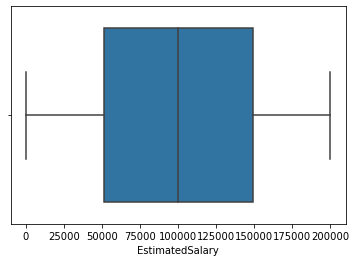

In [191]:
sns.boxplot(dataset.EstimatedSalary)

### Customers with an annual fee of 15% of salary

In [192]:
client_15 = dataset.query("EstimatedSalary <= 100090.2398809998")
print("O número total de clientes com taxa de 15%% é  %.2f" %client_15.shape[0])

O número total de clientes com taxa de 15% é  4993.00


### Customers with an annual fee of 20% of salary

In [193]:
client_20 = dataset.query("EstimatedSalary > 100090.2398809998")

print("O número total de clientes com taxa de 20%% é  %.2f" %client_20.shape[0])

O número total de clientes com taxa de 20% é  5007.00


### Annual profit of the bank with active customers

In [194]:
lucro_anual = (client_15.query("Exited == 0")['EstimatedSalary'].sum().round(3)*(0.15)+ client_20.query("Exited == 0")['EstimatedSalary'].sum().round(3)*(0.20))

print("O lucro anual a partir das taxas de serviço é de", lucro_anual)

O lucro anual a partir das taxas de serviço é de 148765752.8655



### Annual bank loss with churn

In [195]:
prejuizo_anual = (client_15.query("Exited == 1")['EstimatedSalary'].sum().round(3)*(0.15)+ client_20.query("Exited == 1")['EstimatedSalary'].sum().round(3)*(0.20))

print("O prejuízo anual a partir das taxas de serviço é de", prejuizo_anual)

O prejuízo anual a partir das taxas de serviço é de 38846324.6335


# 3. Churn data

In [196]:
Churn_client = dataset.query('Exited == "1"')
Churn_client.shape[0]

2037

In [197]:
perc_churn = (Churn_client.shape[0]/dataset.shape[0])*100

print("Churn percentage is %.2f %% of total customers" %perc_churn)

Churn percentage is 20.37 % of total customers


## 3.1 Análise de Histogramas por Features

In [198]:
Churn_client.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
5,645,Spain,Male,44,8,113755.78,2,1,0,149756.71,1
7,376,Germany,Female,29,4,115046.74,4,1,0,119346.88,1
16,653,Germany,Male,58,1,132602.88,1,1,0,5097.67,1


In [199]:
Churn_client.columns

Index(['CreditScore', 'Geography', 'Gender', 'Age', 'Tenure', 'Balance',
       'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary',
       'Exited'],
      dtype='object')

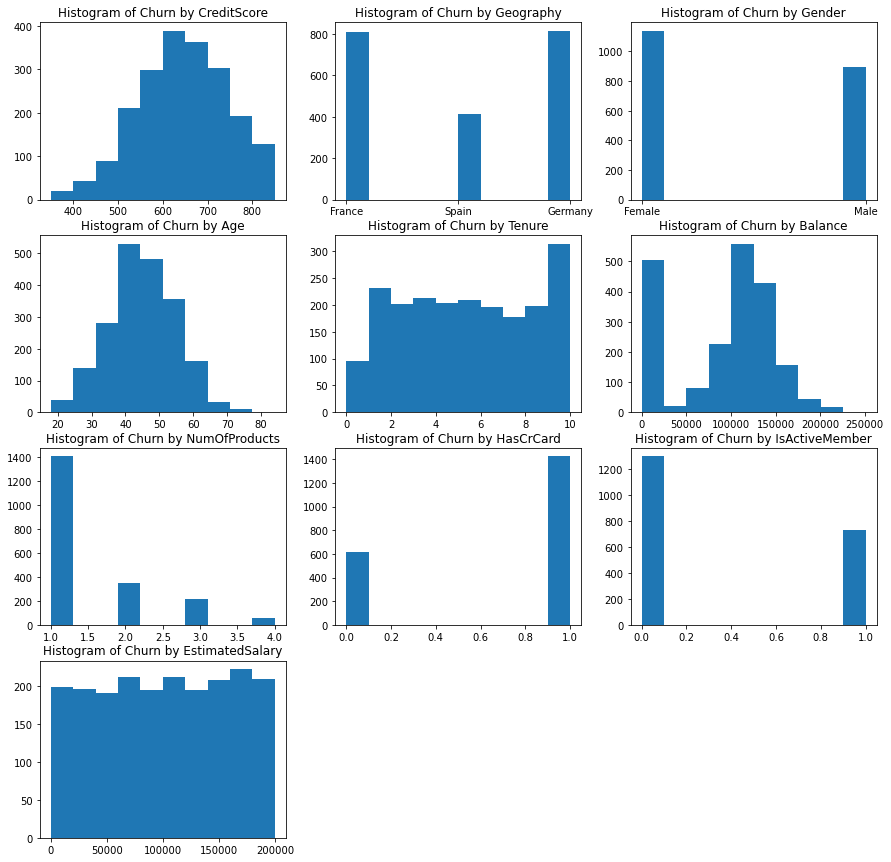

In [200]:

coluna = Churn_client.columns

plt.figure(figsize=(15,15))
for i in range(10):
    j = i+1
    plt.subplot(4,3,j)
    plt.hist(Churn_client[coluna[i]])
    plt.title("Histogram of Churn by {}" .format(Churn_client.columns[i]))
    

## 3.2 Churn profile

##### The profile of the churn client is described mainly by Germans, aged between 40 and 50, with average credit score, having an active account for a greater number of years, with an empty bank account or with an average amount of money. Most of these customers have only one product, a credit card and are active

# 4. Models

In [201]:
X = dataset.drop("Exited",axis=1)
y = dataset["Exited"]

## 4.1 Baseline (Dummy Classifier)

In [202]:


SEED = 301
np.random.seed(SEED)

modelo = DummyClassifier()
results = cross_validate(modelo, X, y, cv = 10, return_train_score=False)
media = results['test_score'].mean()
desvio_padrao = results['test_score'].std()
print("Accuracy com dummy stratified, 10 = [%.2f, %.2f]" % ((media - 2 * desvio_padrao)*100, (media + 2 * desvio_padrao) * 100))

C:\Users\Leticia\anaconda3\lib\site-packages\sklearn\dummy.py:131: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  warnings.warn("The default value of strategy will change from "


Accuracy com dummy stratified, 10 = [65.37, 70.27]



## 4.2 Replacing categorical variables

In [203]:
mapa = {
        "France":0,
        "Germany":1,
        "Spain": 2,
        "Male":0,
        "Female":1       
}

In [204]:
dataset["Geography"] = dataset["Geography"].map(mapa)
dataset.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,0,Female,42,2,0.00,1,1,1,101348.88,1
1,608,2,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,0,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,0,Female,39,1,0.00,2,0,0,93826.63,0
4,850,2,Female,43,2,125510.82,1,1,1,79084.10,0


In [205]:
dataset["Gender"] = dataset["Gender"].map(mapa)
dataset.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,0,1,42,2,0.00,1,1,1,101348.88,1
1,608,2,1,41,1,83807.86,1,0,1,112542.58,0
2,502,0,1,42,8,159660.80,3,1,0,113931.57,1
3,699,0,1,39,1,0.00,2,0,0,93826.63,0
4,850,2,1,43,2,125510.82,1,1,1,79084.10,0



## 4.3 Separating the variables again

In [206]:
X = dataset.drop("Exited", axis=1)
y = dataset.Exited

## 4.4 Decision Tree Classifier

In [207]:

SEED = 301
np.random.seed(SEED)

modelo = DecisionTreeClassifier(max_depth=5)
results = cross_validate(modelo, X, y, cv = 10, return_train_score=False)
media = results['test_score'].mean()
desvio_padrao = results['test_score'].std()
print("Accuracy com Decision Tree Classifier, 10 = [%.2f, %.2f]" % ((media - 2 * desvio_padrao)*100, (media + 2 * desvio_padrao) * 100))

Accuracy com Decision Tree Classifier, 10 = [83.49, 86.91]



### 4.4.1 Analysis of the hyperparameters of the decision tree model


In [208]:

SEED=301
np.random.seed(SEED)

espaco_de_parametros = {
    "max_depth" : [3, 5],
    "min_samples_split" : [32, 64, 128],
    "min_samples_leaf" : [32, 64, 128],
    "criterion" : ["gini", "entropy"]
}

busca = GridSearchCV(DecisionTreeClassifier(),
                    espaco_de_parametros,
                    cv = KFold(n_splits = 10, shuffle=True))
busca.fit(X, y)
resultados = pd.DataFrame(busca.cv_results_)


In [209]:


scores = cross_val_score(busca, X, y, cv = KFold(n_splits=10, shuffle=True))

def imprime_score(scores):
  media = scores.mean() * 100
  desvio = scores.std() * 100
  print("Accuracy médio %.2f" % media)
  print("Intervalo [%.2f, %.2f]" % (media - 2 * desvio, media + 2 * desvio))
    
imprime_score(scores)

Accuracy médio 84.97
Intervalo [82.08, 87.86]


In [210]:
melhor = busca.best_estimator_
print(melhor)

DecisionTreeClassifier(criterion='entropy', max_depth=5, min_samples_leaf=32,
                       min_samples_split=32)


## 4.5 SVC - Stimator Vector Classifier

In [211]:


def imprime_resultados(results):
  media = results['test_score'].mean() * 100
  desvio = results['test_score'].std() * 100
  print("Accuracy médio %.2f" % media)
  print("Intervalo [%.2f, %.2f]" % (media - 2 * desvio, media + 2 * desvio))

SEED = 301
np.random.seed(SEED)

scaler = StandardScaler()
modelo_svc = SVC()

pipeline = Pipeline([('transformacao',scaler), ('estimador',modelo_svc)])

cv = KFold(n_splits = 10)
results = cross_validate(pipeline, X, y, cv = cv, return_train_score=False)
imprime_resultados(results)

Accuracy médio 85.50
Intervalo [83.72, 87.28]


In [214]:
SEED = 301
np.random.seed(SEED)

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state= SEED)

X_test_1, X_val, y_test_1, y_val = train_test_split(X_test,y_test, test_size=0.2, random_state= SEED)

scaler = StandardScaler()
scaler.fit(X_train)
x_train = scaler.transform(X_train)
x_test = scaler.transform(X_test)
x_test_1 = scaler.transform(X_test_1)
x_val = scaler.transform(X_val)

modelo = SVC()
modelo.fit(x_train, y_train)

previsao = modelo.predict(x_test_1)
acuracia = accuracy_score(y_test_1,previsao)*100
print("The accuracy of the model using test data is %.2f%%" %acuracia)

validacao = modelo.predict(x_val)
acuracia = accuracy_score(y_val,validacao)*100
print("The accuracy of the model using nonseen data is %.2f%%" %acuracia)


The accuracy of the model using test data is 87.31%
The accuracy of the model using nonseen data is 83.00%


# 5. Final model

## 5.1 Predict Probability

In [213]:
SEED = 301
np.random.seed(SEED)

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state= SEED)

X_test_1, X_val, y_test_1, y_val = train_test_split(X_test,y_test, test_size=0.2, random_state= SEED)


modelo = DecisionTreeClassifier(criterion='entropy', max_depth=5, min_samples_leaf=32,
                       min_samples_split=32)
modelo.fit(X_train,y_train)
previsao = modelo.predict(X_test_1)
acuracia = accuracy_score(y_test_1,previsao)*100
print("The accuracy of the model using test data is %.2f%%" %acuracia)

validacao = modelo.predict(X_val)
acuracia = accuracy_score(y_val,validacao)*100
print("The accuracy of the model using nonseen data is %.2f%%" %acuracia)



The accuracy of the model using test data is 86.56%
The accuracy of the model using nonseen data is 83.75%


In [ ]:
nons_data = [[514, 1, 1, 48, 1, 112230.38, 1, 1, 0, 16717.11 ] ]

predict = pd.DataFrame(modelo.predict_proba(nons_data).round(3)*100,columns=[["Score_active_client_%","Score_Churn_%"]])

df = pd.DataFrame(nons_data, columns=X.columns)
result = pd.concat([df,predict],axis=1)
result

In [215]:
prejuizo_anual*0.8375*0.7

22773657.816389374

### Since 83,75% is the performance of the Churn forecasting model, actions can be taken, since we would know in which customers we should invest in financial incentives. If 70% of these customers renew the contract, the company would profit an estimated 22773657.81 EUR.

# 6. Saving

In [ ]:
import pickle


pickle.dump(modelo,open("modelo.sav","wb"))



